# Chapter 6. Pandas 파일 불러오기와 저장
- read_csv(): CSV 파일 읽기
- read_excel(): 엑셀 파일 읽기
- read_html(): HTML 파일 내의 테이블 데이터 읽기
- read_json(), read_sql(), read_xml() 등 수많은 함수가 있음

In [1]:
import pandas as pd

### 1. CSV 파일 읽기
- CSV 파일은 데이터 분석에서 가장 많이 사용하는 데이터 파일 포맷으로 pandas에서 쉽게 읽어들이는 것이 가능하다.

#### read_csv() 매개변수
- https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
- filepath_or_buffer: 첫 파라미터이며 주로 읽을 파일의 경로명
- sep: 항목 구분자(CSV는 보통 comma - ,를 사용)로 사용할 문자열 혹은 정규표현식
- header: 컬럼명(column label)이 있는 행번호를 지정, 보통 지정하지 않으면 첫 줄을 컬럼명으로 사용. 없으면 None으로 설정
- names: 컬럼명을 리스트로 지정 가능
- index_col: 행의 인덱스로 사용할 컬럼 지정, 지정하지 않으면 상황을 보고 알아서 지정하거나 새로 생성(index_col=None)
- dtype: 전체 dtype을 하나로 지정하거나, 딕셔너리 형태로 각 열의 데이터 타입을 지정할 수 있음
- nrows: 읽어올 행의 수. 파일의 일부만 읽을 때 지정
- encoding: 인코딩 타입을 지정, 파일에서 사용된 인코딩 타입을 써줌. 예를 들어 UTF-8을 사용한 경우 "utf-8"로 지정
- 이 외에도 다양한 매개변수가 있음

참고: https://github.com/adeshpande3/Pandas-Tutorial/blob/master/Pandas%20Tutorial.ipynb

#### 다양한 포맷의 CSV 파일 연습

1. 표준형
- 첫 줄은 열(컬럼)의 이름
- 인덱스 라벨은 지정되지 않으면 정수 인덱스를 자동으로 할당
```
Name,Age,Score
David,42,44
Rocky,31,55
Madonna,34,55
Cathrine,25,67
Teresa,47,69
```

In [2]:
#열 이름과 인덱스 라벨을 확인
df = pd.read_csv('./data/file1.csv')
df

,Name,Age,Score
0,David,42,44
1,Rocky,31,55
2,Madonna,34,55
3,Cathrine,25,67
4,Teresa,47,69


2. 열 이름과 인덱스 모두 없는 경우
- 열 이름이 없으므로 0, 1, 2와 같이 정수가 이름으로 자동 할당됨
```
David,42,44
Rocky,31,55
Madonna,34,55
Cathrine,25,67
Teresa,47,69
```

In [3]:
df = pd.read_csv('./data/file2.csv', header=None)
df

,0,1,2
0,David,42,44
1,Rocky,31,55
2,Madonna,34,55
3,Cathrine,25,67
4,Teresa,47,69


3. 인덱스 라벨을 유추해서 자동으로 할당하는 경우
- 열 이름의 수보다 한 행에 있는 값의 수보다 한개 많으면, 첫 줄을 인덱스 라벨로 할당 
```
Name,Age,Score
202401, David,42,44
202402, Rocky,31,55
202403, Madonna,34,55
202404, Cathrine,25,67
202405, Teresa,47,69
```

In [4]:
df = pd.read_csv('./data/file3.csv')
df

,Name,Age,Score
202401,David,42,44
202402,Rocky,31,55
202403,Madonna,34,55
202404,Cathrine,25,67
202405,Teresa,47,69


4. 인덱스 라벨이 있는 열을 지정
- 인덱스 라벨로 사용할 열을 지정: index_col
- 이 때 지정한 열에 이름이 있으면 인덱스 라벨에 이름이 할당됨

In [5]:
df = pd.read_csv('./data/file4.csv', index_col=0)
df

,Name,Age,Score
id,,,
202401,David,42,44
202402,Rocky,31,55
202403,Madonna,34,55
202404,Cathrine,25,67
202405,Teresa,47,69


In [6]:
#index_col을 지정하지 않았을 때와 지정했을 때의 모양을 비교
df = pd.read_csv('./data/file4.csv')
df

,id,Name,Age,Score
0,202401,David,42,44
1,202402,Rocky,31,55
2,202403,Madonna,34,55
3,202404,Cathrine,25,67
4,202405,Teresa,47,69


5. 구분자가 ,가 아닌 경우
- sep 매개변수를 이용해서 지정이 가능
- 아래 예는 , 대신 space(공백)을 구분자로 사용
- \t(탭)를 구분자로 사용하는 경우도 자주 있음
```
d Name Age Score
202401 David 42 44
202402 Rocky 31 55
202403 Madonna 34 55
202404 Cathrine 25 67
202405 Teresa 47 69
```

In [7]:
df = pd.read_csv('./data/file5.csv', sep=' ', index_col=0)
df

,Name,Age,Score
id,,,
202401,David,42,44
202402,Rocky,31,55
202403,Madonna,34,55
202404,Cathrine,25,67
202405,Teresa,47,69


### 2. RegularSeasonCompactResults 데이터셋 예제
- CSV 파일은 데이터 분석에서 가장 많이 사용하는 데이터 파일 포맷으로 pandas에서 쉽게 읽어들이는 것이 가능하다.
- 미국대학농구(NCAA)의 1985부터 2016년 까지의 자료를 예제로 사용. 
- CSV 파일로 되어 있으며 **pd.read_csv()** 를 이용하여 읽어들이면 **dataframe** 변수 형태로 내용을 반환한다.
- 참고로 파일은 다음과 같은 형태로 저장되어 있다.
```text
Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
1985,20,1228,81,1328,64,N,0
1985,25,1106,77,1354,70,H,0
1985,25,1112,63,1223,56,H,0
1985,25,1165,70,1432,54,H,0
...
```
- Season: 경기 년도
- Wteam: 이긴 팀
- Wscore: 이긴 팀의 점수
- Lteam: 진 팀
- Lscore: 진 팀의 점수
- Wloc: 이긴 팀 기준으로 한 장소 - H(Home), N(Neutral), A(Away)

참고: https://github.com/adeshpande3/Pandas-Tutorial/blob/master/Pandas%20Tutorial.ipynb

In [8]:
df = pd.read_csv('./data/RegularSeasonCompactResults.csv')

#### 기초적인 정보 확인

- 위 예에서 df는 데이터프레임을 가리키는 변수이다. 
- 데이터프레임은 보통 많은 수의 행을 갖고 있으므로, 간단하게 첫 몇 줄(보통은 다섯 줄)만 보고 싶다면 **head()** 함수 사용
- 마지막 몇 줄을 보고 싶다면 **tail()** 함수를 사용
- 괄호 안에 숫자를 쓰면 그 수만큼 행이 반환된다.

In [9]:
df.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [10]:
df.tail(3)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
145286,2016,132,1246,82,1401,77,N,1
145287,2016,132,1277,66,1345,62,N,0
145288,2016,132,1386,87,1433,74,N,0


데이터프레임의 **shape** 속성은 행과 열의 수를 나타낸다.

In [11]:
df.shape

(145289, 8)

**columns** 속성과 **tolist()** 함수를 이용하면 열의 이름들을 리스트로 반환할 수 있다.

In [12]:
df.columns.tolist()

['Season', 'Daynum', 'Wteam', 'Wscore', 'Lteam', 'Lscore', 'Wloc', 'Numot']

각 열에 대해 평균, 최소값 등의 다양한 통계량을 보고 싶다면 **describe()** 함수를 사용한다.

In [13]:
df.describe()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Numot
count,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000
mean,2001.574834,75.223816,1286.720646,76.600321,1282.864064,64.497009,0.044387
std,9.233342,33.287418,104.570275,12.173033,104.829234,11.380625,0.247819
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000
25%,1994.000000,47.000000,1198.000000,68.000000,1191.000000,57.000000,0.000000
50%,2002.000000,78.000000,1284.000000,76.000000,1280.000000,64.000000,0.000000
75%,2010.000000,103.000000,1379.000000,84.000000,1375.000000,72.000000,0.000000
max,2016.000000,132.000000,1464.000000,186.000000,1464.000000,150.000000,6.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145289 entries, 0 to 145288
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Season  145289 non-null  int64 
 1   Daynum  145289 non-null  int64 
 2   Wteam   145289 non-null  int64 
 3   Wscore  145289 non-null  int64 
 4   Lteam   145289 non-null  int64 
 5   Lscore  145289 non-null  int64 
 6   Wloc    145289 non-null  object
 7   Numot   145289 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 8.9+ MB


In [15]:
df.dtypes

Season     int64
Daynum     int64
Wteam      int64
Wscore     int64
Lteam      int64
Lscore     int64
Wloc      object
Numot      int64
dtype: object

### 데이터 프레임 관련 복습
- 궁금한 것들을 검색해보기

In [16]:
# 시즌 별로 몇 게임이나 했을까?
df['Season'].value_counts().head()

Season
2016    5369
2014    5362
2015    5354
2013    5320
2010    5263
Name: count, dtype: int64

In [17]:
#이긴 팀을 기준으로 Wloc의 Home, Away, Neutral은 몇 게임씩일까?
#Home이 Away보다 유리할까?
df['Wloc'].value_counts()

Wloc
H    86471
A    44229
N    14589
Name: count, dtype: int64

In [18]:
#경기 중에서 이긴 팀의 점수가 가장 높은 것은 얼마일까?
df['Wscore'].max()

186

In [19]:
#경기 중에서 이긴 팀의 점수가 가장 높은 경기는 무엇일까?
df['Wscore'].idxmax()

24970

In [20]:
#경기 중에서 이긴 팀의 점수가 가장 높은 경기의 내용은?
df.loc[df['Wscore'].idxmax()]

Season    1991
Daynum      68
Wteam     1258
Wscore     186
Lteam     1109
Lscore     140
Wloc         H
Numot        0
Name: 24970, dtype: object

In [21]:
#이긴 팀의 점수가 가장 높은 경기에서 진 팀의 점수는?
df.loc[df['Wscore'].idxmax(), 'Lscore']

140

In [22]:
#이긴 팀의 점수와 진 팀의 점수 차이가 가장 큰 것은?
(df['Wscore'] - df['Lscore']).max()

91

In [23]:
#이긴 팀의 점수와 진 팀의 점수 차이가 가장 큰 경기의 내용은?
df.loc[(df['Wscore'] - df['Lscore']).idxmax()]

Season    1996
Daynum      48
Wteam     1409
Wscore     141
Lteam     1341
Lscore      50
Wloc         H
Numot        0
Name: 44653, dtype: object

In [24]:
#반대로 이긴 팀의 점수와 진 팀의 점수 차이가 가장 작은 경기의 내용은?
df.loc[(df['Wscore'] - df['Lscore']).idxmin()]

Season    1985
Daynum      25
Wteam     1218
Wscore      79
Lteam     1337
Lscore      78
Wloc         H
Numot        0
Name: 5, dtype: object

In [25]:
#이긴 팀의 점수가 160점 이상인 경기들은?
df[df['Wscore'] >= 160]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
16853,1989,68,1258,162,1109,144,A,0
17867,1989,92,1258,181,1109,150,H,0
19653,1990,30,1328,173,1109,101,H,0
20022,1990,40,1116,166,1109,101,H,0
24341,1991,47,1328,172,1258,112,H,0
24970,1991,68,1258,186,1109,140,H,0


In [26]:
#이긴 팀의 점수가 160점 이상인 경기들 중에서 짐 팀의 점수가 140점 이상인 경기들은?
df[(df['Wscore'] >= 160) & (df['Lscore'] >= 140)]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
16853,1989,68,1258,162,1109,144,A,0
17867,1989,92,1258,181,1109,150,H,0
24970,1991,68,1258,186,1109,140,H,0


In [27]:
#2016년에는 몇 게임을 했을까?
(df['Season'] == 2016).sum()

5369

In [28]:
#2016년 게임만 따로 꺼내서 df2016에 저장
df2016 = df[df['Season'] == 2016]
df2016.shape

(5369, 8)

### 3. CSV 파일로 데이터프레임 저장
- **to_csv()** 함수를 사용하면 데이터프레임을 csv로 쉽게 저장할 수 있다.

In [29]:
# 앞서 사용한 데이터프레임 예제에서 네 명만 사용
d = {
    'Name':['Alisa','Bobby','Cathrine','Madonna'],
   'Age':[26,27,25,34],
   'Score':[89,87,67,55]}
 
df = pd.DataFrame(d)
df

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,34,55


In [30]:
# test.csv로 저장하고 다시 불러오기
df.to_csv('test.csv')
df2 = pd.read_csv('test.csv')
df2

,Unnamed: 0,Name,Age,Score
0,0,Alisa,26,89
1,1,Bobby,27,87
2,2,Cathrine,25,67
3,3,Madonna,34,55


- 위 예를 보면 첫 열에 Unnamed가 있는 것을 볼 수 있음
- 저장할 때 index가 함께 저장되고 읽어들일때는 새로운 인덱스를 자동으로 할당했기 때문
- 이것을 해결하는 방법으로 첫째 저장할 때 인덱스를 제외하고 저장하거나, 
- 둘째 읽어들일때 첫 열을 인덱스로 읽어들이는 방법이 있음

In [31]:
#첫째 방법
df.to_csv('test.csv', index=False) #인덱스를 저장하지 않음
df2 = pd.read_csv('test.csv')
df2

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,34,55


In [32]:
#둘째 방법
df.to_csv('test.csv')
df2 = pd.read_csv('test.csv', index_col=0) #첫 열을 인덱스로 저장
df2

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,34,55


In [33]:
# 열 이름을 저장하고 싶지 않을 때
df.to_csv('test.csv', header=False, index=False)
# 열 이름을 저장하지 않았으므로 읽을 때도 None으로 지정
df2 = pd.read_csv('test.csv', header=None) #첫 열을 인덱스로 저장
df2

,0,1,2
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,34,55


### 4. JSON 형태로 저장하고 불러오기
- JSON 상세내용 참고: https://www.json.org/json-ko.html
- JSON (JavaScript Object Notation)은 경량의 DATA-교환 형식이다. 
- 이 형식은 사람이 읽고 쓰기에 용이하며, 기계가 분석하고 생성함에도 용이하다. 
- JavaScript Programming Language, Standard ECMA-262 3rd Edition - December 1999의 일부에 토대를 두고 있다. 
- JSON은 완벽하게 언어로 부터 독립적이지만 C-family 언어 - C, C++, C#, Java, JavaScript, Perl, Python 그외 다수 - 의 프로그래머들에게 친숙한 관습을 사용하는 텍스트 형식이다. 
- 이러한 속성들이 JSON을 이상적인 DATA-교환 언어로 만들고 있다.

In [34]:
#JSON 형태 파일로 저장
df.to_json('test.json')

- 저장된 JSON 파일의 내용

`{"Name":{"0":"Alisa","1":"Bobby","2":"Cathrine","3":"Madonna"},"Age":{"0":26,"1":27,"2":25,"3":34},"Score":{"0":89,"1":87,"2":67,"3":55}}`

In [35]:
#JSON 파일을 읽어서 데이터프레임으로 변환하기
df2 = pd.read_json('test.json')
df2

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,34,55


### 5. 이진 데이터 형식으로 저장하고 불러오기
- 지금까지의 저장 형식은 문자열로 내용을 저장
- 따라서 저장된 파일을 텍스트 에디터로 읽으면 사람이 읽을 수 있음
- 이진 데이터는 문자열이 아닌 binary 형식으로 저장되기 때문에 파일 내용을 사람이 읽을 수 없음

In [36]:
# pickle 모듈을 이용해서 이진 데이터 형식으로 저장
df.to_pickle('test.pickle')

In [37]:
# pickle 저장 파일 읽어오기
df2 = pd.read_pickle('test.pickle')
df2

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,34,55


### 6. 엑셀 파일로 저장하고 불러오기
- 마이크로소프트 엑셀 파일로 저장 가능
- 마찬가지로 엑셀 파일을 읽어오는 것도 가능
- 이 기능을 위해서는 추가로 openpyxl(xlsx 파일)을 설치해야 함
    - pip install openpyxl
- 예전 엑셀 포맷(xls)은 xlrd 패키지 설치
    - pip install xlrd

In [38]:
# 데이터 프레임으로 엑셀 형태로 저장
df.to_excel('test.xlsx')

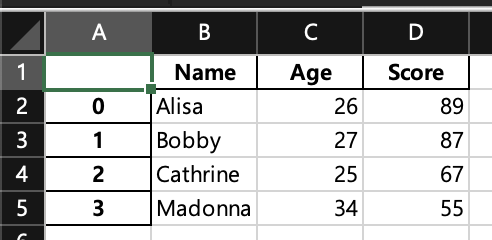

In [39]:
# 엑셀 파일 읽어오기
df2 = pd.read_excel('test.xlsx', index_col=0)
df2

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,34,55
